# Toronto Neighborhood Demographics

I found a database to explore the relationship between average incomes in Toronto with other factors, like whether the residents rent or own, and whether they use public transportation.

Import json file for Toronto Neighborhood demographics

In [83]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim
address = 'Toronto'

#geolocator = Nominatim(user_agent="toronto_explorer")
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Here's a map derived from the latitude and longitude values.

In [84]:
import folium # map rendering library
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
map_toronto

In [85]:
import pandas as pd
df_code = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods')[1]

Here's a sample of that data.

In [86]:
df_code.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


We're interested in the columns related to population, income % renters and transportation habits, so we remove other columns

In [87]:
df_code.drop(df_code.columns[[1,2,4,5,6,11,12]],axis=1,inplace=True)
df_code.rename(columns={'Second most common language (after English) by name': '2nd language'},inplace=True)
df_code.head()

,Name,Population,Average Income,Transit Commuting %,% Renters,2nd language
0,Toronto CMA Average,5113149,40704,10.6,11.4,NaN
1,Agincourt,44577,25750,11.1,5.9,Cantonese (19.3%)
2,Alderwood,11656,35239,8.8,8.5,Polish (6.2%)
3,Alexandra Park,4355,19687,13.8,28.0,Cantonese (17.9%)
4,Allenby,2513,245592,5.2,3.4,Russian (1.4%)


We'll delete the first row, which summarizes all the rest of the data. 

In [88]:
df_code.drop(df_code.index[0],inplace=True)

Here's the final frame we will study.

In [89]:
df_code.head()

,Name,Population,Average Income,Transit Commuting %,% Renters,2nd language
1,Agincourt,44577,25750,11.1,5.9,Cantonese (19.3%)
2,Alderwood,11656,35239,8.8,8.5,Polish (6.2%)
3,Alexandra Park,4355,19687,13.8,28.0,Cantonese (17.9%)
4,Allenby,2513,245592,5.2,3.4,Russian (1.4%)
5,Amesbury,17318,27546,16.4,19.7,Spanish (6.1%)


In [46]:
address = df_code['Name']
city = 'Toronto, Canada'
geolocator = Nominatim(user_agent="foursquare_agent")
columnames = ['Name', 'lat', 'long']
df_latlong= pd.DataFrame(columns=columnames)
for name in address:
    address1 = name + ',' + city
    location = geolocator.geocode(address1)
    #print(name, location)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
    #    print(latitude, ' ', longitude)
    else:
        latitude = 0.0
        longitude = 0.0
    df_latlong = df_latlong.append({'Name':name, 'lat': latitude, 'long': longitude}, ignore_index=True)
    #print('The geograpical coordinate of' + address1 + ' are {}, {}.'.format(latitude, longitude))

In [90]:
df_code = df_code.merge(df_latlong, on='Name')
c = []
for b in df_code['2nd language']:
    c.append(b.split('('))
    
def Extract(lst): 
    return [item[0] for item in lst] 
      
# Driver code  
d = Extract(c)
df_code['2nd language']= d
df_code.head()

,Name,Population,Average Income,Transit Commuting %,% Renters,2nd language,lat,long
0,Agincourt,44577,25750,11.1,5.9,Cantonese,43.785353,-79.278549
1,Alderwood,11656,35239,8.8,8.5,Polish,43.601717,-79.545232
2,Alexandra Park,4355,19687,13.8,28.0,Cantonese,43.650758,-79.404308
3,Allenby,2513,245592,5.2,3.4,Russian,43.711351,-79.553424
4,Amesbury,17318,27546,16.4,19.7,Spanish,43.706162,-79.483492


In [91]:
import folium # map rendering library
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(df_code['lat'], df_code['long'], df_code['Name']):
    #print(lat,lng,neighborhood)
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

# Getting Neighborhood Venue data from Foursquare
This is the same process that we followed in a previous lab.

In [92]:
CLIENT_ID = '2DATFCYXFIG3V0AJRBZYJA0JEIDN3KAG0FFBXL1ODEIEMKIE' # your Foursquare ID
CLIENT_SECRET = '12FSWSY2HA0NPCMOKTSIXQNCW0AKD3R3URK0CD5IMAM32MOU' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2DATFCYXFIG3V0AJRBZYJA0JEIDN3KAG0FFBXL1ODEIEMKIE
CLIENT_SECRET:12FSWSY2HA0NPCMOKTSIXQNCW0AKD3R3URK0CD5IMAM32MOU


In [103]:
df_code.loc[0, 'Name']
neighborhood_latitude = df_code.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = df_code.loc[0, 'long'] # neighborhood longitude value

neighborhood_name = df_code.loc[0, 'Name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))
#lat = df_code[0,'lat']
#long = df_code[0,'long']
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL





Latitude and longitude values of Agincourt are 43.7853531, -79.2785494.


'https://api.foursquare.com/v2/venues/explore?&client_id=2DATFCYXFIG3V0AJRBZYJA0JEIDN3KAG0FFBXL1ODEIEMKIE&client_secret=12FSWSY2HA0NPCMOKTSIXQNCW0AKD3R3URK0CD5IMAM32MOU&v=20180605&ll=43.7853531,-79.2785494&radius=500&limit=100'

In [104]:
import requests 
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed581ba47b43d0023bf11cb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Agincourt',
  'headerFullLocation': 'Agincourt, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 12,
  'suggestedBounds': {'ne': {'lat': 43.789853104500004,
    'lng': -79.27232780227703},
   'sw': {'lat': 43.7808530955, 'lng': -79.28477099772297}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5058e50ce4b0a3bd556ccbdf',
       'name': 'Tim Hortons',
       'location': {'address': '4200 Sheppard Ave East',
        'crossStreet': 'Midland Ave',
        'lat': 43.78563681034057,
        'lng': -79.27921459078789,
        'labeledLatLngs': [{'lab

In [99]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [105]:
import json
from pandas.io.json import json_normalize 
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,Tim Hortons,Coffee Shop,43.785637,-79.279215
1,One2 Snacks,Asian Restaurant,43.787048,-79.276658
2,In Cheon House Korean & Japanese Restaurant 인천관,Korean Restaurant,43.786468,-79.275693
3,Beef Noodle Restaurant 老李牛肉麵,Chinese Restaurant,43.785937,-79.276031
4,Congee King,Chinese Restaurant,43.785908,-79.276042


In [130]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

12 venues were returned by Foursquare.


In [106]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        if lat != 0.0:    
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
        # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [192]:
toronto_venues = getNearbyVenues(names=df_code['Name'],
                                   latitudes=df_code['lat'],
                                   longitudes=df_code['long']
                                  )


Agincourt
Alderwood
Alexandra Park
Allenby
Amesbury
Armour Heights
Banbury
Bathurst Manor
Bay Street Corridor
Bayview Village
Bayview Woods – Steeles
Bedford Park
Bendale
Birch Cliff
Bloor West Village
Bracondale Hill
Branson
Bridle Path
Brockton
Cabbagetown
Caribou Park
Carleton Village
Casa Loma
Centennial
Chaplin Estates
Christie Pits
Church and Wellesley
Clairville
Clairlea
Cliffcrest
Cliffside
Corktown
Crescent Town
Cricket Club
Davenport
Davisville
Deer Park
Discovery District
Distillery District/West Don Lands
Don Mills
Don Valley Village


In [109]:
print(toronto_venues.shape)
toronto_venues.head()

(807, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,43.785353,-79.278549,Tim Hortons,43.785637,-79.279215,Coffee Shop
1,Agincourt,43.785353,-79.278549,One2 Snacks,43.787048,-79.276658,Asian Restaurant
2,Agincourt,43.785353,-79.278549,In Cheon House Korean & Japanese Restaurant 인천관,43.786468,-79.275693,Korean Restaurant
3,Agincourt,43.785353,-79.278549,Beef Noodle Restaurant 老李牛肉麵,43.785937,-79.276031,Chinese Restaurant
4,Agincourt,43.785353,-79.278549,Congee King,43.785908,-79.276042,Chinese Restaurant


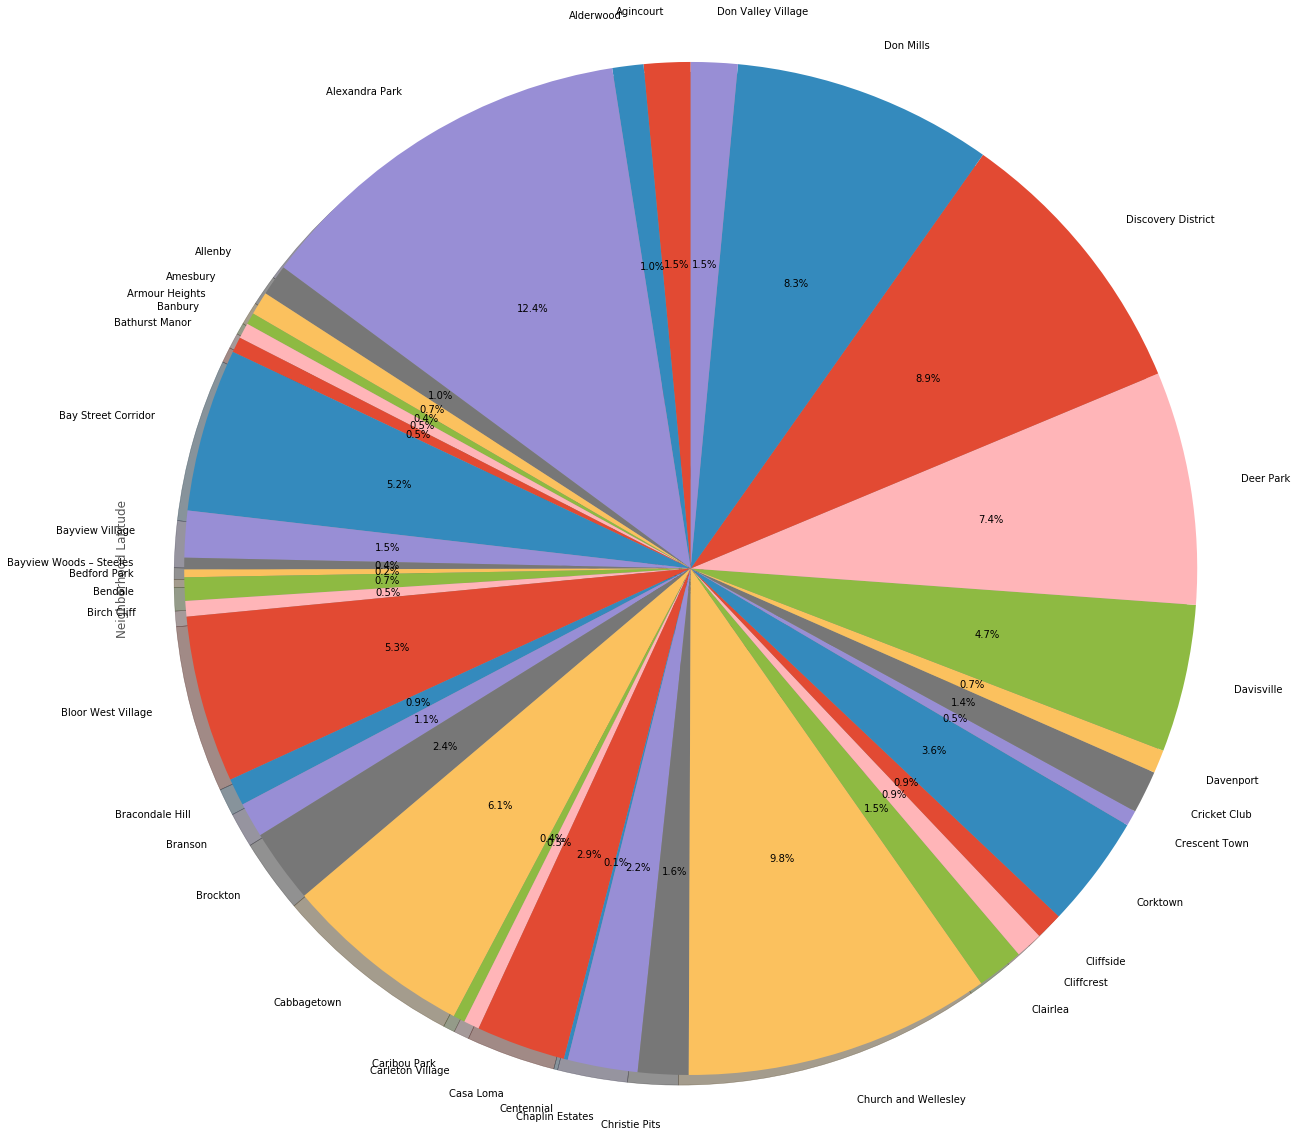

In [185]:
df_count = toronto_venues.groupby('Neighborhood').count()
df_count['Neighborhood Latitude'].plot(kind='pie',
                            figsize=(20, 20),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

In [111]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 192 uniques categories.


In [112]:
# one hot encoding
t_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
t_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [t_onehot.columns[-1]] + list(t_onehot.columns[:-1])
t_onehot = t_onehot[fixed_columns]

toronto_grouped = t_onehot.groupby('Neighborhood').mean().reset_index()
#toronto_grouped.shape
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                   venue  freq
0     Chinese Restaurant  0.25
1            Coffee Shop  0.08
2      Korean Restaurant  0.08
3             Food Court  0.08
4  Vietnamese Restaurant  0.08


----Alderwood----
            venue  freq
0     Pizza Place  0.25
1    Dance Studio  0.12
2        Pharmacy  0.12
3  Sandwich Place  0.12
4     Coffee Shop  0.12


----Alexandra Park----
                    venue  freq
0                     Bar  0.10
1  Furniture / Home Store  0.04
2    Caribbean Restaurant  0.04
3                    Café  0.03
4             Coffee Shop  0.03


----Allenby----
                  venue  freq
0            Restaurant  0.12
1  Fast Food Restaurant  0.12
2    African Restaurant  0.12
3          Intersection  0.12
4             Bookstore  0.12


----Amesbury----
                venue  freq
0         Gas Station  0.17
1                Bank  0.17
2        Intersection  0.17
3         Coffee Shop  0.17
4  Athletics & Sports  0.17


----Armour Heights----
     

In [113]:
import numpy as np
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Coffee Shop,Korean Restaurant,Shopping Mall,Cantonese Restaurant,Asian Restaurant,Train Station,Hong Kong Restaurant,Food Court,Vietnamese Restaurant
1,Alderwood,Pizza Place,Dance Studio,Pub,Pharmacy,Coffee Shop,Gym,Sandwich Place,Donut Shop,Filipino Restaurant,Fast Food Restaurant
2,Alexandra Park,Bar,Furniture / Home Store,Caribbean Restaurant,Arts & Crafts Store,Coffee Shop,Café,Pizza Place,Boutique,Italian Restaurant,Poutine Place
3,Allenby,African Restaurant,Bookstore,Restaurant,Big Box Store,Fish & Chips Shop,Intersection,Café,Fast Food Restaurant,Yoga Studio,Ethiopian Restaurant
4,Amesbury,Bank,Gas Station,Coffee Shop,Intersection,Park,Athletics & Sports,Yoga Studio,Flower Shop,Fish Market,Fish & Chips Shop


In [114]:
# one hot encoding
t_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
t_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [t_onehot.columns[-1]] + list(t_onehot.columns[:-1])
t_onehot = t_onehot[fixed_columns]

t_onehot.tail()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
802,Don Valley Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,Don Valley Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804,Don Valley Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
805,Don Valley Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,Don Valley Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
toronto_grouped = t_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Animal Shelter,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,...,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.083333,0.00,0.000000,0.000000,0.00000,0.083333,0.00,0.000000,0.000000,0.000000
1,Alderwood,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000
2,Alexandra Park,0.000000,0.000,0.010000,0.000000,0.01,0.02,0.020000,0.000000,0.030000,...,0.000000,0.01,0.020000,0.000000,0.00000,0.010000,0.01,0.000000,0.000000,0.010000
3,Allenby,0.000000,0.125,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000
4,Amesbury,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000
5,Armour Heights,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000
6,Banbury,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000
7,Bathurst Manor,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000
8,Bay Street Corridor,0.023810,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.023810,...,0.000000,0.00,0.000000,0.000000,0.02381,0.000000,0.00,0.023810,0.000000,0.023810
9,Bayview Village,0.000000,0.000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000


In [133]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Chinese Restaurant,Coffee Shop,Korean Restaurant,Shopping Mall,Cantonese Restaurant,Asian Restaurant,Train Station,Hong Kong Restaurant,Food Court,Vietnamese Restaurant
1,Alderwood,Pizza Place,Dance Studio,Pub,Pharmacy,Coffee Shop,Gym,Sandwich Place,Donut Shop,Filipino Restaurant,Fast Food Restaurant
2,Alexandra Park,Bar,Furniture / Home Store,Caribbean Restaurant,Arts & Crafts Store,Coffee Shop,Café,Pizza Place,Boutique,Italian Restaurant,Poutine Place
3,Allenby,African Restaurant,Bookstore,Restaurant,Big Box Store,Fish & Chips Shop,Intersection,Café,Fast Food Restaurant,Yoga Studio,Ethiopian Restaurant
4,Amesbury,Bank,Gas Station,Coffee Shop,Intersection,Park,Athletics & Sports,Yoga Studio,Flower Shop,Fish Market,Fish & Chips Shop


## Clustering neighborhoods

In [145]:

from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering libraryimport KMeans
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 1, 4, 0, 0], dtype=int32)

In [153]:
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_code

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')
toronto_merged = toronto_merged.dropna()
#toronto_merged['Cluster Labels']
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
toronto_merged.head(10) # check the last columns!

,Name,Population,Average Income,Transit Commuting %,% Renters,2nd language,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,44577,25750,11.1,5.9,Cantonese,43.785353,-79.278549,0,Chinese Restaurant,Coffee Shop,Korean Restaurant,Shopping Mall,Cantonese Restaurant,Asian Restaurant,Train Station,Hong Kong Restaurant,Food Court,Vietnamese Restaurant
1,Alderwood,11656,35239,8.8,8.5,Polish,43.601717,-79.545232,0,Pizza Place,Dance Studio,Pub,Pharmacy,Coffee Shop,Gym,Sandwich Place,Donut Shop,Filipino Restaurant,Fast Food Restaurant
2,Alexandra Park,4355,19687,13.8,28.0,Cantonese,43.650758,-79.404308,0,Bar,Furniture / Home Store,Caribbean Restaurant,Arts & Crafts Store,Coffee Shop,Café,Pizza Place,Boutique,Italian Restaurant,Poutine Place
3,Allenby,2513,245592,5.2,3.4,Russian,43.711351,-79.553424,0,African Restaurant,Bookstore,Restaurant,Big Box Store,Fish & Chips Shop,Intersection,Café,Fast Food Restaurant,Yoga Studio,Ethiopian Restaurant
4,Amesbury,17318,27546,16.4,19.7,Spanish,43.706162,-79.483492,0,Bank,Gas Station,Coffee Shop,Intersection,Park,Athletics & Sports,Yoga Studio,Flower Shop,Fish Market,Fish & Chips Shop
5,Armour Heights,4384,116651,10.8,16.1,Russian,43.743944,-79.430851,0,Deli / Bodega,Market,Pharmacy,Yoga Studio,Electronics Store,Flower Shop,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant
6,Banbury,6641,92319,6.1,4.8,Unspecified Chinese,43.742796,-79.369957,1,Park,Auto Garage,Tennis Court,Yoga Studio,Flower Shop,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
7,Bathurst Manor,14945,34169,13.4,18.6,Russian,43.763893,-79.456367,4,Convenience Store,Playground,Park,Baseball Field,Yoga Studio,Electronics Store,Flower Shop,Fish Market,Fish & Chips Shop,Filipino Restaurant
8,Bay Street Corridor,4787,40598,17.1,49.3,Mandarin,43.665272,-79.387531,0,Sushi Restaurant,Japanese Restaurant,Bubble Tea Shop,Mediterranean Restaurant,Yoga Studio,Health & Beauty Service,Hobby Shop,Hotel,Indian Restaurant,Martial Arts Dojo
9,Bayview Village,12280,46752,14.4,15.6,Cantonese,43.769197,-79.376662,0,Bank,Pizza Place,Sandwich Place,Sporting Goods Shop,Fast Food Restaurant,Metro Station,Gas Station,Fish Market,Breakfast Spot,Persian Restaurant


In [175]:
toronto_merged.loc[toronto_merged['2nd language'] == 'Cantonese ']
#toronto_merged['2nd language']

,Name,Population,Average Income,Transit Commuting %,% Renters,2nd language,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,44577,25750,11.1,5.9,Cantonese,43.785353,-79.278549,0,Chinese Restaurant,Coffee Shop,Korean Restaurant,Shopping Mall,Cantonese Restaurant,Asian Restaurant,Train Station,Hong Kong Restaurant,Food Court,Vietnamese Restaurant
2,Alexandra Park,4355,19687,13.8,28.0,Cantonese,43.650758,-79.404308,0,Bar,Furniture / Home Store,Caribbean Restaurant,Arts & Crafts Store,Coffee Shop,Café,Pizza Place,Boutique,Italian Restaurant,Poutine Place
9,Bayview Village,12280,46752,14.4,15.6,Cantonese,43.769197,-79.376662,0,Bank,Pizza Place,Sandwich Place,Sporting Goods Shop,Fast Food Restaurant,Metro Station,Gas Station,Fish Market,Breakfast Spot,Persian Restaurant
10,Bayview Woods – Steeles,13298,41485,11.2,13.9,Cantonese,43.798127,-79.382973,2,Dog Run,Park,Trail,Eastern European Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
30,Cliffside,9386,32701,14.8,11.4,Cantonese,43.711170,-79.248177,0,Pizza Place,Pub,Coffee Shop,Grocery Store,Park,Sandwich Place,Breakfast Spot,Yoga Studio,Eastern European Restaurant,Fish & Chips Shop


In [197]:
toronto_merged.loc[(toronto_merged['2nd language'] == 'Cantonese ') & (toronto_merged['Average Income'] > 40000)]
#toronto_merged['2nd language']

,Name,Population,Average Income,Transit Commuting %,% Renters,2nd language,lat,long,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Bayview Village,12280,46752,14.4,15.6,Cantonese,43.769197,-79.376662,0,Bank,Pizza Place,Sandwich Place,Sporting Goods Shop,Fast Food Restaurant,Metro Station,Gas Station,Fish Market,Breakfast Spot,Persian Restaurant
10,Bayview Woods – Steeles,13298,41485,11.2,13.9,Cantonese,43.798127,-79.382973,2,Dog Run,Park,Trail,Eastern European Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market


In [154]:
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['lat'], toronto_merged['long'], toronto_merged['Name'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [128]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.2


Let's first look at income distribution

In [122]:
import numpy as np
#df_code['Average Income'].head(10)
count, bin_edges = np.histogram(df_code['Average Income'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[27  4  7  1  0  0  0  1  0  1]
[ 19687.  49129.  78571. 108013. 137455. 166897. 196339. 225781. 255223.
 284665. 314107.]


In [123]:
df_code.dtypes

Name                    object
Population               int64
Average Income           int64
Transit Commuting %    float64
% Renters              float64
2nd language            object
lat                    float64
long                   float64
dtype: object

We will first generate a histogram of income distributions

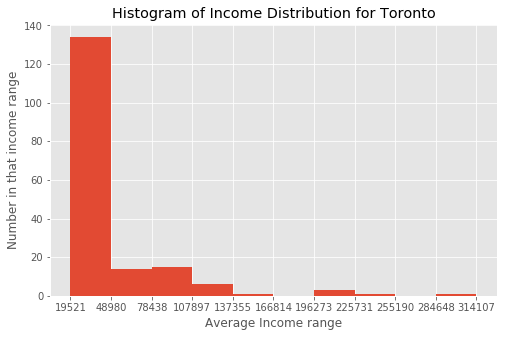

In [10]:
#df_code['Average Income'].plot(kind='hist', figsize=(8, 5))
df_code['Average Income'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Income Distribution for Toronto') # add a title to the histogram
plt.ylabel('Number in that income range') # add y-label
plt.xlabel('Average Income range') # add x-label

plt.show()

Let's try to explore correlations between the variables. First, at low ends of the income scale there is a higher percentage of renters, but also a lot of variability. At high ends of the income scale, there are fewer data points but the suggestion is that there are fewer renters.

<Figure size 1440x720 with 0 Axes>

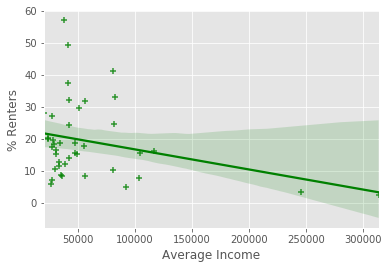

<Figure size 1440x720 with 0 Axes>

In [156]:
import seaborn as sns
ax = sns.regplot(x='Average Income', y='% Renters', data=df_code, color='green', marker='+')
plt.figure(figsize=(20, 10))




A similar trend seems to hold between income and the number of those who use public transport.

<Figure size 1440x720 with 0 Axes>

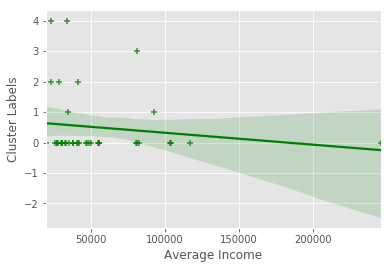

<Figure size 1440x720 with 0 Axes>

In [193]:
ax = sns.regplot(x='Average Income', y='Cluster Labels', data=toronto_merged, color='green', marker='+')
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

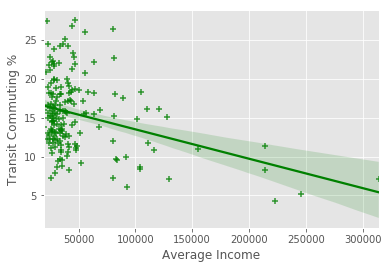

<Figure size 1440x720 with 0 Axes>

In [13]:
ax = sns.regplot(x='Average Income', y='Transit Commuting\xa0%', data=df_code, color='green', marker='+')
plt.figure(figsize=(20, 10))

Another histogram of the data pairing income with renting

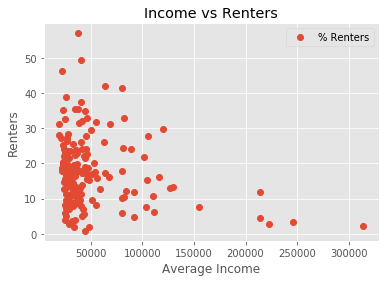

In [15]:
df_code.plot(x='Average Income', y='% Renters', style='o')  
plt.title('Income vs Renters')  
plt.xlabel('Average Income')  
plt.ylabel('Renters')  
plt.show()

I used seaborn to show the distribution of incomes

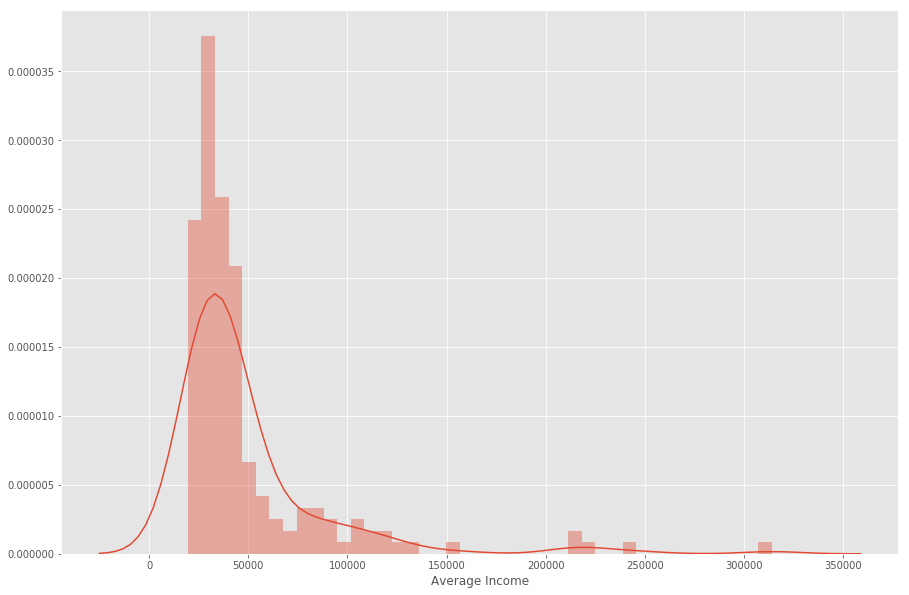

In [16]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_code['Average Income'])

I built a linear model that allows me to predict the income from a combination of information about whether they commute using public transportation and whether they rent.

In [21]:
from sklearn import linear_model
#X = df_code['Transit Commuting\xa0%'].values.reshape(-1,1)
X = df_code[['Transit Commuting\xa0%','% Renters']]
y = df_code['Average Income'].values.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn model
New_Commuting = 21.75
New_Renters = 21.3
print ('Predicted Income: \n', regr.predict([[New_Commuting ,New_Renters]]))

Intercept: 
 [95378.89519557]
Coefficients: 
 [[-2986.0825566      3.05139686]]
Predicted Income: 
 [[30496.59434245]]


The rest of the work I did was incomplete. I wanted to show how incomes cluster in neighborhoods. I found a map of Toronto that used polygons to show the neighborhoods.